# Digit recognition with scikit-learn

Going a bit beyond the usual [tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) I also tried writing my own digits and see if it can be recognized by the classifier.
I did not try it for very long and got a 60% success rate, which I find not so bad.

In [1]:
from sklearn import datasets
from pylab import plt, np
%matplotlib inline
digits = datasets.load_digits()

Create the [support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine) classifier.

In [2]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

We fit the model to almost all data, leaving only one poor guy out.

In [3]:
clf.fit(digits.data[:-1], digits.target[:-1])  

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

Lets see if the one left out is predicted correctly now.

In [4]:
print clf.predict(digits.data[-1:]) == digits.target[-1]

[ True]


Helas!

# Using my own handwritten digits as a test

So in a next step I wrote down some digits myself. Let's read those handwritten digits and convert them to 8x8 matrices as they were used to train our classifier.

In [26]:
from skimage.io import imread
from scipy.misc import imresize
from sklearn.datasets.base import Bunch

In [32]:
my_digits = Bunch()
my_digits.images = []
my_digits.target = []
my_digits.data = []
size = (8, 8)
for i in range(10):
    # take mean over color channels
    im = np.mean(imread('my_digits/{}.png'.format(i)), axis=2)
    im = np.array(imresize(im, size), dtype=float)
    # invert
    im = np.max(im) - im
#     print im
    # rescale to 16 in integer
    im = (im - np.min(im))
    im /= np.max(im)
    im[im < 0.2] = 0.0
    im *= 16
    im = np.array(im, dtype=int)
    my_digits.images.append(im)
    my_digits.target.append(i)
    my_digits.data.append(im.reshape(-1))

I have to admit that my digits are of very poor quality. Maybe some further image manipulation can improve the result.
But I guess the main reason is the low resolution of the training data. If it would be higher I expect it to yield much better results.

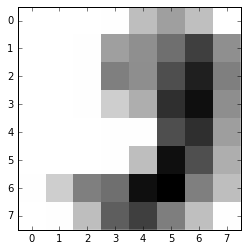

In [33]:
plt.imshow(my_digits.images[9], cmap='gray_r', interpolation='none')

In [29]:
print clf.predict(my_digits.data)
print clf.predict(my_digits.data) == my_digits.target

[4 1 2 3 4 4 4 7 8 1]
[False  True  True  True  True False False  True  True False]


So with little effort I got a success rate of 60%.
Interestingly all wrong ones are classified as "4" with the exception of my "9".

Note that for the data set itself the success rate is much higher.
http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

    Confusion matrix:
    [[87  0  0  0  1  0  0  0  0  0]
     [ 0 88  1  0  0  0  0  0  1  1]
     [ 0  0 85  1  0  0  0  0  0  0]
     [ 0  0  0 79  0  3  0  4  5  0]
     [ 0  0  0  0 88  0  0  0  0  4]
     [ 0  0  0  0  0 88  1  0  0  2]
     [ 0  1  0  0  0  0 90  0  0  0]
     [ 0  0  0  0  0  1  0 88  0  0]
     [ 0  0  0  0  0  0  0  0 88  0]
     [ 0  0  0  1  0  1  0  0  0 90]]